<a href="https://colab.research.google.com/github/crcastroc/Automatic-segmentation-of-collective-violence-with-metrics---NB/blob/main/ELBOW_k%3D10_n%3D18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Google Drive montado correctamente
🚀 Iniciando análisis de puntos de cambio...
✅ Datos cargados. Dimensiones: (762, 8) (meses x series)

🔍 Analizando serie: IVCNN
   Parámetro r estimado: 0.7165
   Puntos óptimos detectados: K* = 1


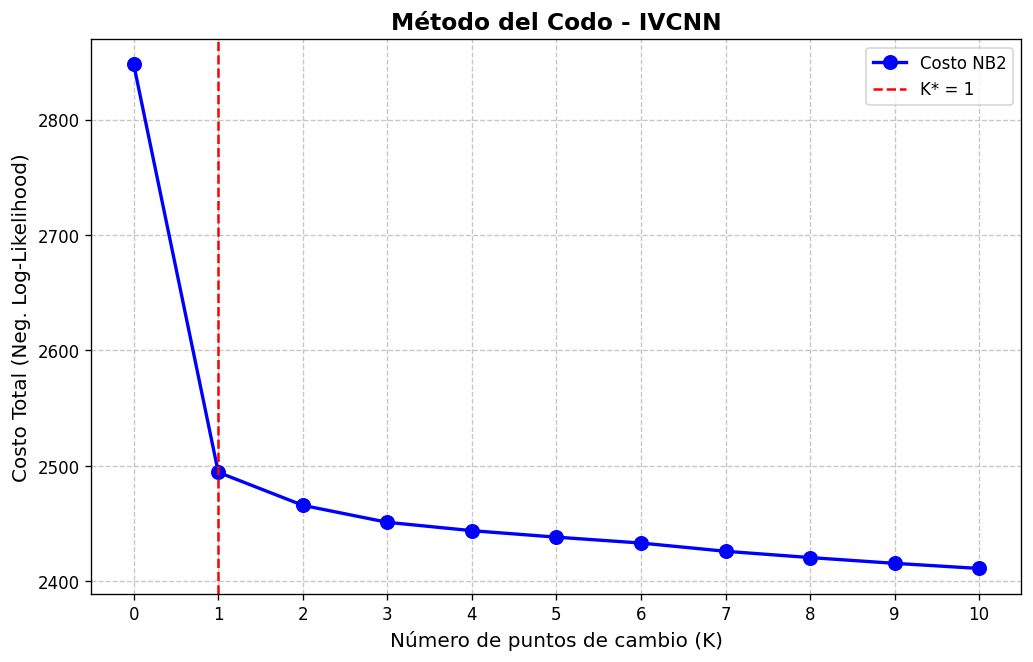


✅ Análisis completado exitosamente!
📊 Gráficas guardadas en: /content/drive/MyDrive/Resultados_Cambio
📥 Resultados exportados a: /content/drive/MyDrive/Resultados_Cambio/Resultados_Puntos_Cambio.xlsx

💡 Para ver los puntos específicos de cambio en cada serie,
   ejecuta el análisis individual con el K* obtenido.

🔍 Analizando serie: IVVNN
   Parámetro r estimado: 0.6868
   Puntos óptimos detectados: K* = 1


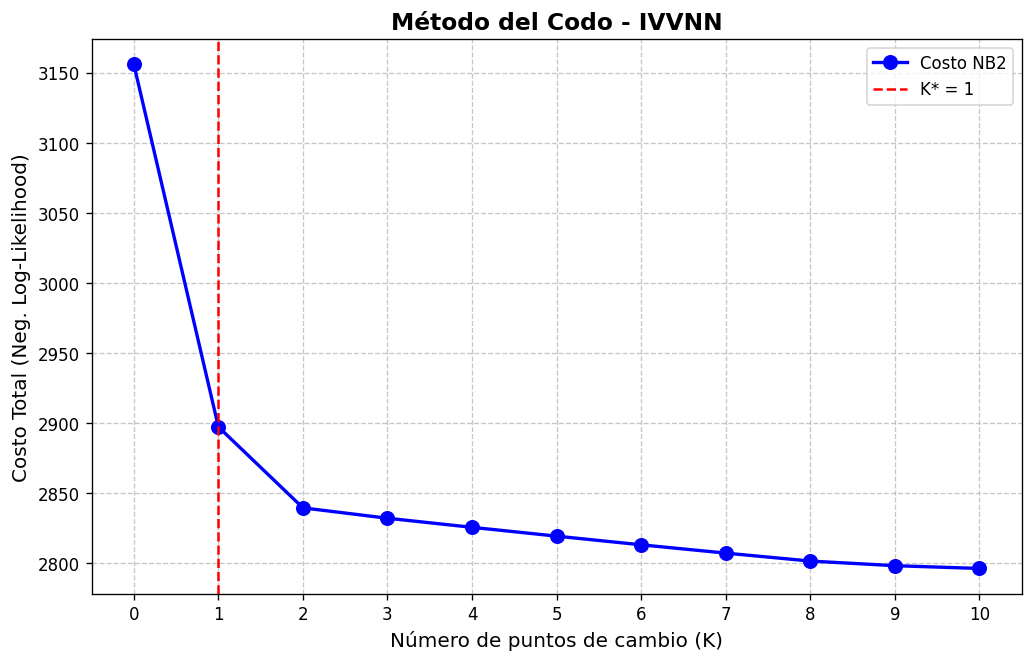


✅ Análisis completado exitosamente!
📊 Gráficas guardadas en: /content/drive/MyDrive/Resultados_Cambio
📥 Resultados exportados a: /content/drive/MyDrive/Resultados_Cambio/Resultados_Puntos_Cambio.xlsx

💡 Para ver los puntos específicos de cambio en cada serie,
   ejecuta el análisis individual con el K* obtenido.

🔍 Analizando serie: SVCNN
   Parámetro r estimado: 0.4367
   Puntos óptimos detectados: K* = 1


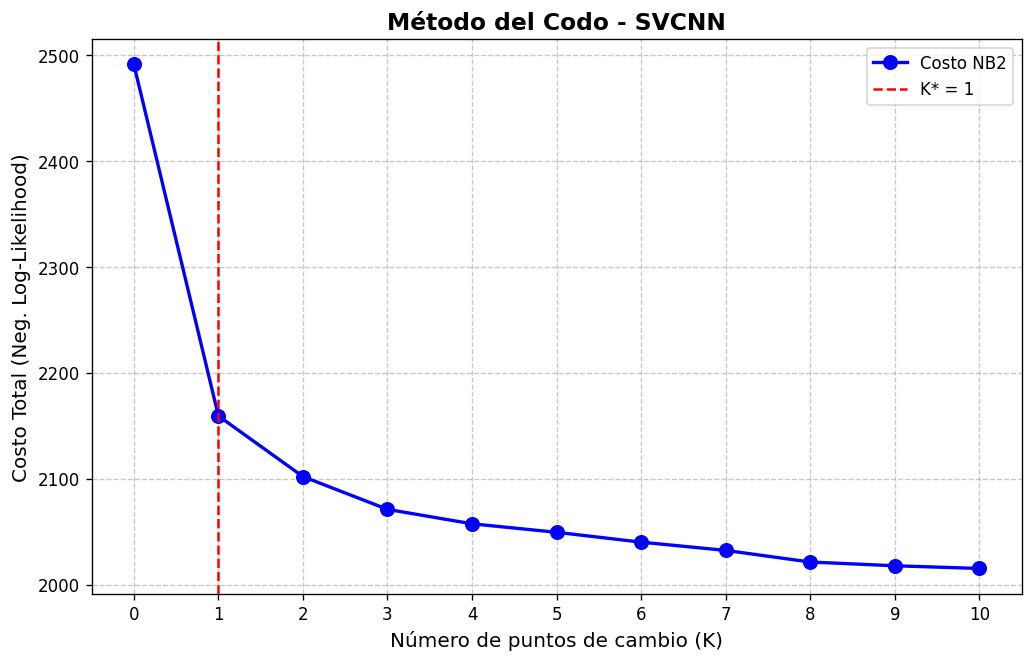


✅ Análisis completado exitosamente!
📊 Gráficas guardadas en: /content/drive/MyDrive/Resultados_Cambio
📥 Resultados exportados a: /content/drive/MyDrive/Resultados_Cambio/Resultados_Puntos_Cambio.xlsx

💡 Para ver los puntos específicos de cambio en cada serie,
   ejecuta el análisis individual con el K* obtenido.

🔍 Analizando serie: SVVNN
   Parámetro r estimado: 0.4357
   Puntos óptimos detectados: K* = 1


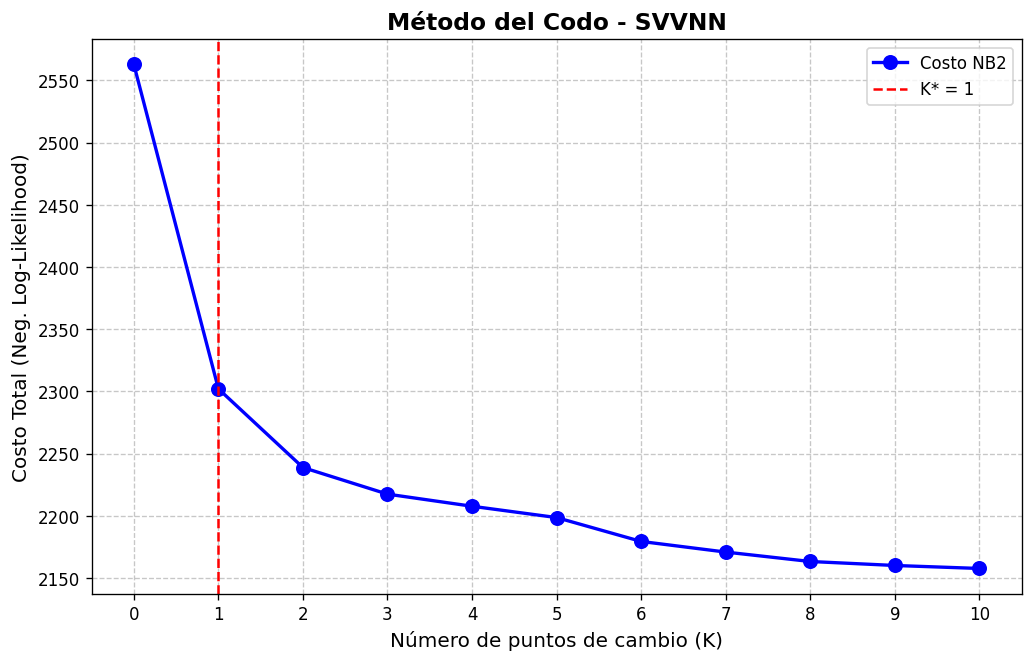


✅ Análisis completado exitosamente!
📊 Gráficas guardadas en: /content/drive/MyDrive/Resultados_Cambio
📥 Resultados exportados a: /content/drive/MyDrive/Resultados_Cambio/Resultados_Puntos_Cambio.xlsx

💡 Para ver los puntos específicos de cambio en cada serie,
   ejecuta el análisis individual con el K* obtenido.

🔍 Analizando serie: IVCN
⚠️ Advertencia: Datos no enteros en IVCN. Forzando a enteros.
   Parámetro r estimado: 1.4569
   Puntos óptimos detectados: K* = 1


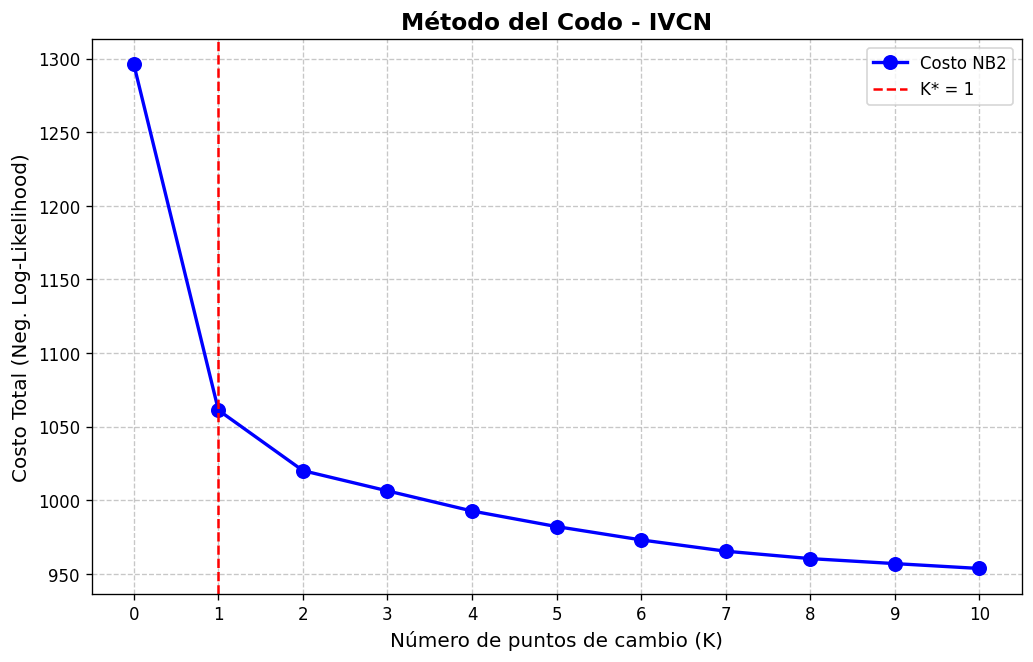


✅ Análisis completado exitosamente!
📊 Gráficas guardadas en: /content/drive/MyDrive/Resultados_Cambio
📥 Resultados exportados a: /content/drive/MyDrive/Resultados_Cambio/Resultados_Puntos_Cambio.xlsx

💡 Para ver los puntos específicos de cambio en cada serie,
   ejecuta el análisis individual con el K* obtenido.

🔍 Analizando serie: IVVN
⚠️ Advertencia: Datos no enteros en IVVN. Forzando a enteros.
   Parámetro r estimado: 1.0961
   Puntos óptimos detectados: K* = 1


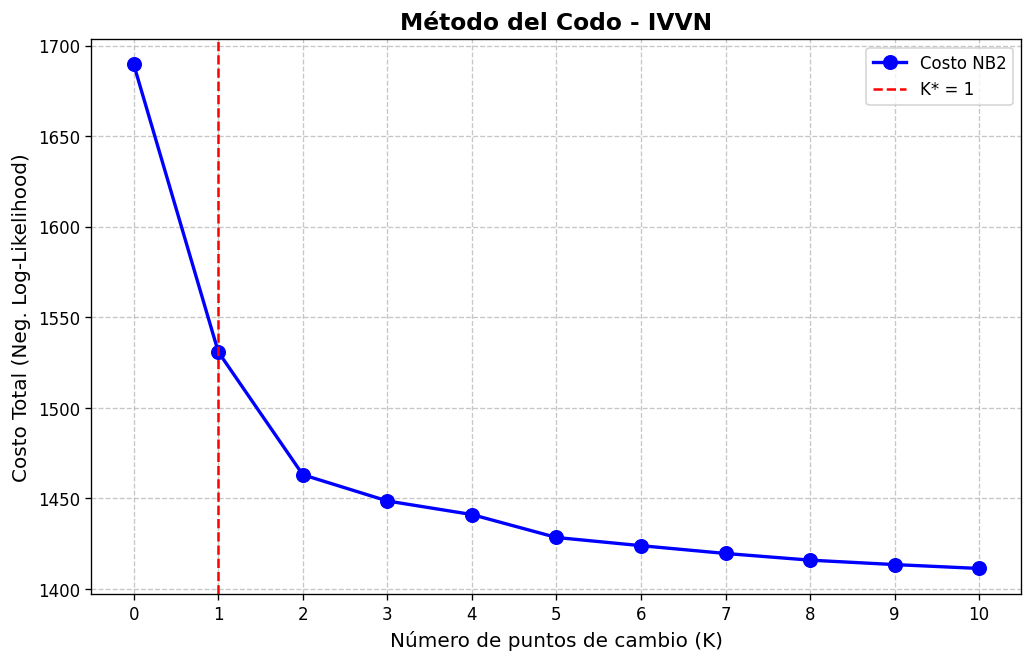


✅ Análisis completado exitosamente!
📊 Gráficas guardadas en: /content/drive/MyDrive/Resultados_Cambio
📥 Resultados exportados a: /content/drive/MyDrive/Resultados_Cambio/Resultados_Puntos_Cambio.xlsx

💡 Para ver los puntos específicos de cambio en cada serie,
   ejecuta el análisis individual con el K* obtenido.

🔍 Analizando serie: SVCN
⚠️ Advertencia: Datos no enteros en SVCN. Forzando a enteros.
   Parámetro r estimado: 0.4873
   Puntos óptimos detectados: K* = 1


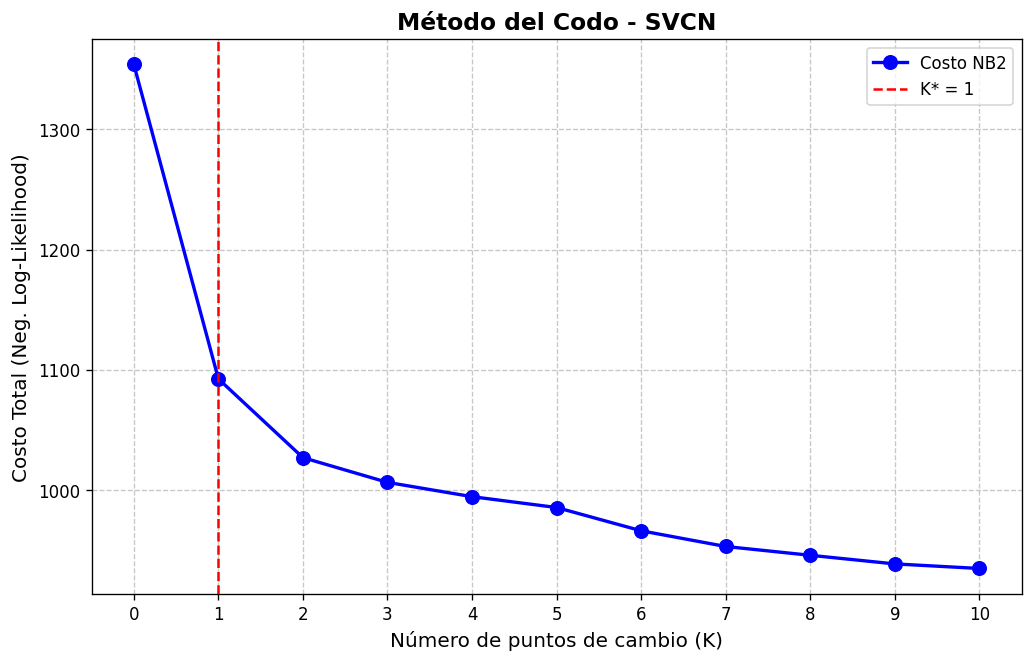


✅ Análisis completado exitosamente!
📊 Gráficas guardadas en: /content/drive/MyDrive/Resultados_Cambio
📥 Resultados exportados a: /content/drive/MyDrive/Resultados_Cambio/Resultados_Puntos_Cambio.xlsx

💡 Para ver los puntos específicos de cambio en cada serie,
   ejecuta el análisis individual con el K* obtenido.

🔍 Analizando serie: SVVN
⚠️ Advertencia: Datos no enteros en SVVN. Forzando a enteros.
   Parámetro r estimado: 0.5021
   Puntos óptimos detectados: K* = 1


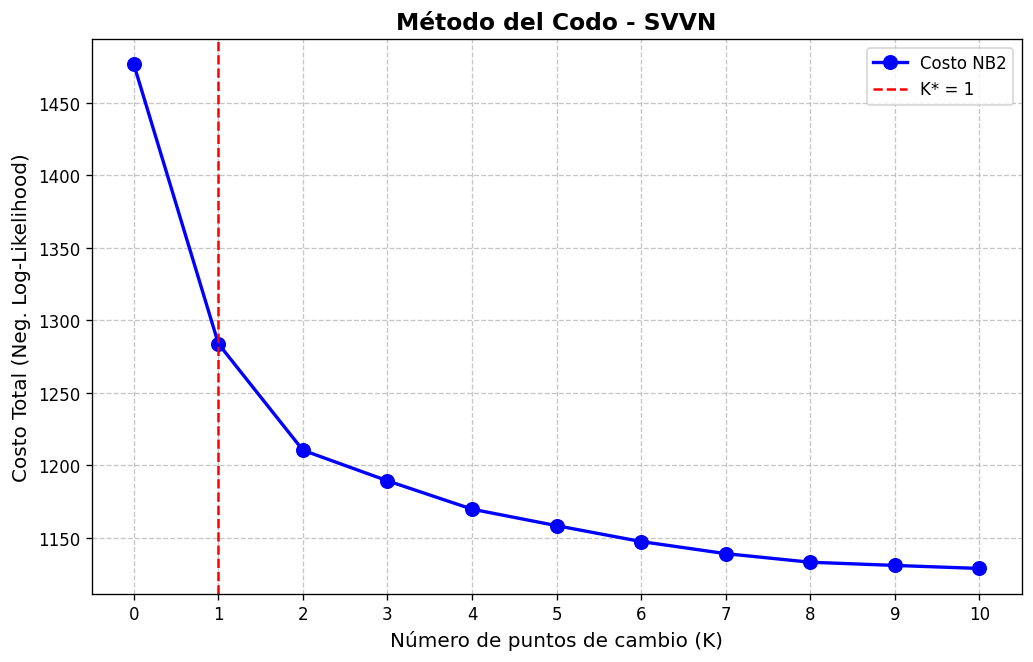


✅ Análisis completado exitosamente!
📊 Gráficas guardadas en: /content/drive/MyDrive/Resultados_Cambio
📥 Resultados exportados a: /content/drive/MyDrive/Resultados_Cambio/Resultados_Puntos_Cambio.xlsx

💡 Para ver los puntos específicos de cambio en cada serie,
   ejecuta el análisis individual con el K* obtenido.


NameError: name 'series_list' is not defined

In [ ]:
 !pip install ruptures pandas numpy matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from typing import List, Tuple
import ruptures as rpt
from ruptures.base import BaseCost
from google.colab import drive
import os

# Montar Google Drive
try:
    drive.mount('/content/drive')
    print("✅ Google Drive montado correctamente")
except Exception as e:
    print(f"❌ Error al montar Drive: {e}")
    raise

# Configuración ajustada
FILE_PATH = '/content/drive/MyDrive/DATOSNAL.xlsx'
SHEET_NAME = 0
K_MAX = 10
MIN_SIZE = 18
SERIES_LIST = ['IVCNN', 'IVVNN', 'SVCNN', 'SVVNN', 'IVCN', 'IVVN', 'SVCN', 'SVVN']

# ==============================================================================

def estimate_r_nb2_global(y: np.ndarray) -> float:
    """Estimación robusta de parámetro r para NB2"""
    y = np.asarray(y).astype(float).reshape(-1)
    mu = y.mean()
    var = y.var(ddof=1) if y.size > 1 else 0.0
    if var > mu and mu > 0:
        r_hat = (mu * mu) / (var - mu)
        return float(max(r_hat, 1e-6))
    return 1e6  # Aproximación Poisson

class CostNegBinomial(BaseCost):
    """Costo corregido para NB2"""
    model = "neg_binom"
    def __init__(self, r: float = 5.0, min_size: int = 2, jump: int = 1):
        if r <= 0:
            raise ValueError("r debe ser positivo")
        self.r = float(r)
        self.min_size = int(min_size)
        self.jump = int(jump)
        self._cum_sum = None

    def fit(self, signal: np.ndarray):
        y = np.asarray(signal)
        if y.ndim == 1:
            y = y.reshape(-1, 1)
        if y.shape[1] != 1:
            raise ValueError("Serie debe ser univariada")
        self.signal = y
        y1 = y[:, 0].astype(float)
        self._cum_sum = np.concatenate(([0.0], np.cumsum(y1)))
        return self

    def error(self, start: int, end: int) -> float:
        n = end - start
        if n < self.min_size:
            return np.inf
        S = self._cum_sum[end] - self._cum_sum[start]
        if S <= 0.0:
            return 0.0
        r = self.r
        cost = (n * r + S) * math.log1p(S / (n * r)) + S * (math.log(n * r) - math.log(S))
        return float(cost)

    def sum_of_costs(self, bkps):
        # Suma los costes de los segmentos definidos por bkps
        total_cost = 0.0
        start = 0
        for end in bkps:
            total_cost += self.error(start, end)
            start = end
        return total_cost

def _elbow_by_curvature(costs: np.ndarray, K_values: np.ndarray) -> int:
    """Método del codo robusto"""
    if len(costs) < 3:
        return int(K_values[np.argmin(costs)])
    curv = np.diff(np.diff(costs))
    return int(K_values[1 + np.argmax(curv)]) if len(curv) > 0 else int(K_values[0])

def segment_nb2_fixed_K_sweep(x: np.ndarray, K_max: int, min_size: int, r_hat: float) -> Tuple[int, np.ndarray, np.ndarray]:
    """Segmentación corregida con manejo robusto de K=0"""
    X = np.asarray(x).reshape(-1, 1)
    n = X.shape[0]
    nb_cost = CostNegBinomial(r=r_hat, min_size=min_size).fit(X)
    algo = rpt.Binseg(model="custom", custom_cost=nb_cost, min_size=min_size).fit(X)
    K_path = np.arange(0, K_max + 1, dtype=int)
    costs = np.empty_like(K_path, dtype=float)
    for idx, K in enumerate(K_path):
        if K == 0:
            bkps = [n]
        else:
            bkps = algo.predict(n_bkps=K)
            if bkps[-1] != n:
                bkps.append(n)
        costs[idx] = nb_cost.sum_of_costs(bkps)
    K_star = _elbow_by_curvature(costs, K_path)
    return K_star, K_path, costs

def plot_cost_vs_K(K_path: np.ndarray, costs: np.ndarray, K_star: int, title: str, save_path: str = None) -> None:
    """Grafica método elbow con estilo profesional"""
    plt.figure(figsize=(10, 6), dpi=120)
    plt.plot(K_path, costs, 'bo-', linewidth=2, markersize=8, label='Costo NB2')
    plt.axvline(x=K_star, color='r', linestyle='--', label=f'K* = {K_star}')
    plt.xlabel('Número de puntos de cambio (K)', fontsize=12)
    plt.ylabel('Costo Total (Neg. Log-Likelihood)', fontsize=12)
    plt.title(f'Método del Codo - {title}', fontsize=14, fontweight='bold')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.xticks(K_path)
    if save_path:
        plt.savefig(save_path, bbox_inches='tight', dpi=200)
    plt.show()

def main():
    print("🚀 Iniciando análisis de puntos de cambio...")
    if not os.path.exists(FILE_PATH):
        print(f"❌ ERROR: Archivo no encontrado en {FILE_PATH}")
        print("Verifica que:")
        print("1. El archivo se llama EXACTAMENTE 'DATOSNAL.xlsx'")
        print("2. Está en la carpeta 'MyDrive' (sin espacio) de tu Google Drive")
        return
    try:
        df = pd.read_excel(FILE_PATH, sheet_name=SHEET_NAME)
        print(f"✅ Datos cargados. Dimensiones: {df.shape} (meses x series)")
    except Exception as e:
        print(f"❌ Error al leer Excel: {e}")
        return
    missing = [col for col in SERIES_LIST if col not in df.columns]
    if missing:
        print(f"❌ Columnas faltantes: {missing}")
        print(f"Columnas disponibles: {df.columns.tolist()}")
        return
    results = []
    output_dir = "/content/drive/MyDrive/Resultados_Cambio"
    os.makedirs(output_dir, exist_ok=True)
    for series in SERIES_LIST:
        print(f"\n🔍 Analizando serie: {series}")
        y = df[series].values.astype(float)
        if not np.all(np.isclose(y, np.round(y))):
            print(f"⚠️ Advertencia: Datos no enteros en {series}. Forzando a enteros.")
            y = np.round(y).astype(int)
        r_hat = estimate_r_nb2_global(y)
        print(f"   Parámetro r estimado: {r_hat:.4f}")
        K_star, K_path, costs = segment_nb2_fixed_K_sweep(y, K_max=K_MAX, min_size=MIN_SIZE, r_hat=r_hat)
        print(f"   Puntos óptimos detectados: K* = {K_star}")
        plot_path = os.path.join(output_dir, f"elbow_{series}.png")
        plot_cost_vs_K(K_path, costs, K_star, title=series, save_path=plot_path)
        results.append({
            "Serie": series,
            "K_optimo": K_star,
            "Costo_minimo": min(costs),
            "r_estimado": r_hat
        })
        results_df = pd.DataFrame(results)
        excel_path = os.path.join(output_dir, "Resultados_Puntos_Cambio.xlsx")
        results_df.to_excel(excel_path, index=False)
        print(f"\n✅ Análisis completado exitosamente!")
        print(f"📊 Gráficas guardadas en: {output_dir}")
        print(f"📥 Resultados exportados a: {excel_path}")
        print("\n💡 Para ver los puntos específicos de cambio en cada serie,")
        print("   ejecuta el análisis individual con el K* obtenido.")


    def exportar_costos_y_puntos_cambio_excel(series_list, df, K_MAX, MIN_SIZE, output_dir):

        writer = pd.ExcelWriter(os.path.join(output_dir, "Costos_y_Puntos_Cambio.xlsx"), engine='xlsxwriter')

    for series in series_list:
        y = df[series].values.astype(float)
        if not np.all(np.isclose(y, np.round(y))):
            y = np.round(y).astype(int)
        r_hat = estimate_r_nb2_global(y)
        X = np.asarray(y).reshape(-1, 1)
        n = X.shape[0]
        nb_cost = CostNegBinomial(r=r_hat, min_size=MIN_SIZE).fit(X)
        algo = rpt.Binseg(model="custom", custom_cost=nb_cost, min_size=MIN_SIZE).fit(X)
        K_path = np.arange(0, K_MAX + 1, dtype=int)
        costos = []
        puntos_cambio = []

        for K in K_path:
            if K == 0:
                bkps = [n]
            else:
                bkps = algo.predict(n_bkps=K)
                if bkps[-1] != n:
                    bkps.append(n)
            costo = nb_cost.sum_of_costs(bkps)
            # Guardar los puntos de cambio (meses) para cada K (excepto el último, que es el final)
            puntos = [p for p in bkps[:-1]] if K > 0 else []
            costos.append(costo)
            puntos_cambio.append(puntos)

        # Crear DataFrame para la serie
        df_result = pd.DataFrame({
            'K': K_path,
            'Costo': costos,
            'Puntos_de_cambio_(mes)': puntos_cambio
        })
        df_result.to_excel(writer, sheet_name=series, index=False)

    writer.close()
    print(f"✅ Archivo 'Costos_y_Puntos_Cambio.xlsx' guardado en: {output_dir}")

if __name__ == "__main__":
    main()


def mostrar_datos_grafica(K_path, costs, K_star, serie):
    print(f"\n📈 Datos de la gráfica para la serie: {serie}")
    print("K\tCosto")
    for k, c in zip(K_path, costs):
        print(f"{k}\t{c:.4f}")
    print(f"\nK óptimo detectado (codo): {K_star}")


    plot_path = os.path.join(output_dir, f"elbow_{series}.png")
    plot_cost_vs_K(K_path, costs, K_star, title=series, save_path=plot_path)
    mostrar_datos_grafica(K_path, costs, K_star, series)  # <-- Añade esta línea

    exportar_costos_y_puntos_cambio_excel(SERIES_LIST, df, K_MAX, MIN_SIZE, output_dir)
